# Top k-mers at SELEX cycle 6

- For a protein which binds DNA specifically, it is useful to inspect top hits. In that instance, a single motif should show high enrichment compared to everything else. Based on the visualisation, it does not look like SALL4’s DNA binding domain ZFC4 binds to any one 5-mer specifically. Let us look at motif logos for the top 6 5-mers ranked by abundance in SELEX cycle 6 of ZFC4.

    ```{attention}
    Motif logos are generated after allowing one mismatch to the seed 5-mer
    ```

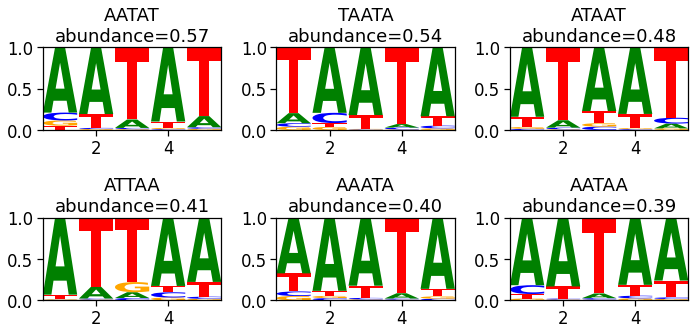

In [1]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt
import seaborn as sns
import bz2
import pickle

from collections import Counter
from collections import defaultdict
from eme_selex.sequence import canonical

sns.set_context("notebook", font_scale=1.5)

k = 5

with bz2.open(f"data/results_ZFC4_None_{k}.bz2") as iH:
    counts = pickle.load(iH)
    _fractions = pickle.load(iH)
    models = pickle.load(iH)

melt_fractions_mean = pd.read_csv("data/melt_fractions_mean.tsv", sep="\t")
df = pd.read_csv("data/metadata.tsv", sep="\t", index_col=7)

def get_logo_mean(models, samples, kmer):
  kmer_pfm = Counter()
  for s in samples:
      kmer_pfm.update(models[s][kmer])
  kmer_ppm = logomaker.transform_matrix(pd.DataFrame.from_dict(kmer_pfm).T, from_type='counts',
                             to_type="probability")
  return kmer_ppm

fig, axes = plt.subplots(2, 3, figsize=(10, 5))
for (i, j), ax in zip(melt_fractions_mean[(melt_fractions_mean["protein"]=="ZFC4") & (melt_fractions_mean["cycle"]==6)][["cycle", "protein", "kmer", "AT", "value"]].sort_values(
  by="value", ascending=False).head(6).iterrows(), axes.flatten()):
    cycle, protein, kmer, at, fraction = j.values
    samples = list(df[(df["protein"]==protein) & (df["cycle"]==cycle)].index)    
    kmer_ppm = get_logo_mean(models, samples, kmer)
    logomaker.Logo(kmer_ppm, ax=ax)
    ax.set_title(f"{kmer}\nabundance={fraction:.2f}")
_ = fig.tight_layout()

```{hint}
To generate PFM models for more k-mers, modify the keyword argument `top` [at this step](kmer_fraction_from_file) to the desired number. By default, it is set to `top=50`.
```